Chapter 18
# 传球问题
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [17]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
# directed_G = nx.DiGraph()
# # 创建有向图的实例

In [3]:
# directed_G.add_nodes_from(['a', 'b', 'c', 'd', 'e', 'f'])
# # 添加多个顶点

In [4]:
# directed_G.add_edges_from([('a','b'),
#                            ('a','c'),
#                            ('a','d'),
#                            ('a','e'),
#                            ('a','f')])

# directed_G.add_edges_from([('b','a'),
#                            ('b','c'),
#                            ('b','d'),
#                            ('b','e'),
#                            ('b','f')])

# directed_G.add_edges_from([('c','a'),
#                            ('c','b'),
#                            ('c','d'),
#                            ('c','e'),
#                            ('c','f')])

# directed_G.add_edges_from([('d','a'),
#                            ('d','b'),
#                            ('d','c'),
#                            ('d','e'),
#                            ('d','f')])

# directed_G.add_edges_from([('e','a'),
#                            ('e','b'),
#                            ('e','c'),
#                            ('e','d'),
#                            ('e','f')])

# directed_G.add_edges_from([('f','a'),
#                            ('f','b'),
#                            ('f','c'),
#                            ('f','d'),
#                            ('f','e')])

In [3]:
G = nx.complete_graph(6, nx.DiGraph())

In [4]:
G.number_of_nodes()

6

In [5]:
G.number_of_edges()

30

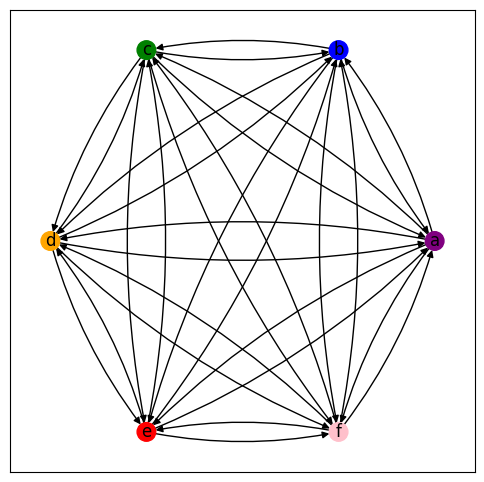

In [6]:
mapping = {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f'}
node_color = ['purple', 'blue', 'green', 'orange', 'red', 'pink']
G = nx.relabel_nodes(G, mapping)
pos = nx.circular_layout(G)

plt.figure(figsize = (6,6))
nx.draw_networkx(G, 
                 pos = pos,
                 connectionstyle='arc3, rad = 0.1',
                 node_color = node_color,
                 node_size = 180)
plt.savefig('6-node directed G, complete.svg')

In [9]:
A = nx.adjacency_matrix(G).todense()
A

array([[0, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1],
       [1, 1, 1, 0, 1, 1],
       [1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 0]], dtype=int32)

In [26]:
# 球在A手里
x0 = np.array([[1,0,0,0,0,0]]).T

In [28]:
# 第1次传球
x1 = A @ x0
x1

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [30]:
x1.sum()

5

In [40]:
A.sum()

30

In [29]:
# 第2次传球
x2 = A @ x1
x2

array([[5],
       [4],
       [4],
       [4],
       [4],
       [4]])

In [35]:
A @ A

array([[5, 4, 4, 4, 4, 4],
       [4, 5, 4, 4, 4, 4],
       [4, 4, 5, 4, 4, 4],
       [4, 4, 4, 5, 4, 4],
       [4, 4, 4, 4, 5, 4],
       [4, 4, 4, 4, 4, 5]], dtype=int32)

In [41]:
(A @ A).sum()

150

In [31]:
x2.sum()

25

In [33]:
# 第3次传球
x3 = A @ x2
x3

array([[20],
       [21],
       [21],
       [21],
       [21],
       [21]])

In [34]:
x3.sum()

125

In [36]:
A@A@A

array([[20, 21, 21, 21, 21, 21],
       [21, 20, 21, 21, 21, 21],
       [21, 21, 20, 21, 21, 21],
       [21, 21, 21, 20, 21, 21],
       [21, 21, 21, 21, 20, 21],
       [21, 21, 21, 21, 21, 20]], dtype=int32)

In [37]:
# 第4次传球
x4 = A @ x3
x4

array([[105],
       [104],
       [104],
       [104],
       [104],
       [104]])

In [39]:
x4.sum()

625

In [38]:
A@A@A@A

array([[105, 104, 104, 104, 104, 104],
       [104, 105, 104, 104, 104, 104],
       [104, 104, 105, 104, 104, 104],
       [104, 104, 104, 105, 104, 104],
       [104, 104, 104, 104, 105, 104],
       [104, 104, 104, 104, 104, 105]], dtype=int32)

## 组合数求法

In [14]:
m = 6
n = 4
import math
total_num = 0

for idx in range(1,math.floor(n/2) + 1):
    
    num_idx = (m - 1)**idx*(m - 2)**(n - 2*idx) * math.comb(n - 1 - idx, idx - 1)
    total_num = total_num + num_idx
    

In [15]:
total_num

105